# EXPLORATORY DATA ANALYSIS   
Notebook containing exploratory data analysis for the UCI Activities of Daily Living (ADL) data set.  Due to the number of plots generated, most will be output to file and compiled in a slide pack that will accompany this notebook.
#### by Matthew Gordon

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as sp
from IPython.display import Image # Required to render images in notebook rather than simply link to them

%matplotlib inline

Read in in the master file dataframe created in the File Extraction Notebook and check it has loaded correctly

In [2]:
# Load in the csv saved from the File Extraction notebook that contains the accelerometer files for each activity
dataset = pd.read_csv("../Data/MasterFileDF.csv")

In [3]:
dataset.head()

,standup_chair,sitdown_chair,comb_hair,walk,descend_stairs,drink_glass,eat_meat,eat_soup,pour_water,liedown_bed,getup_bed,use_telephone,brush_teeth
0,Accelerometer-2011-03-23-10-39-18-standup_chai...,Accelerometer-2011-03-24-09-50-16-sitdown_chai...,Accelerometer-2011-03-24-09-44-34-comb_hair-f1...,Accelerometer-2011-03-24-09-51-07-walk-f1.txt,Accelerometer-2011-03-24-10-24-02-descend_stai...,Accelerometer-2011-03-24-10-07-02-drink_glass-...,Accelerometer-2011-03-24-13-06-15-eat_meat-f1.txt,Accelerometer-2011-03-24-13-33-22-eat_soup-f1.txt,Accelerometer-2011-03-24-10-04-32-pour_water-f...,Accelerometer-2011-03-29-09-19-22-liedown_bed-...,Accelerometer-2011-03-29-09-21-17-getup_bed-f1...,Accelerometer-2011-03-29-09-30-56-use_telephon...,Accelerometer-2011-04-11-13-28-18-brush_teeth-...
1,Accelerometer-2011-03-23-10-42-01-standup_chai...,Accelerometer-2011-03-24-10-27-33-sitdown_chai...,Accelerometer-2011-03-24-10-26-33-comb_hair-f1...,Accelerometer-2011-03-24-09-52-11-walk-f1.txt,Accelerometer-2011-03-24-10-25-11-descend_stai...,Accelerometer-2011-03-24-10-16-02-drink_glass-...,Accelerometer-2011-03-24-13-10-14-eat_meat-f1.txt,Accelerometer-2011-03-24-13-44-18-eat_soup-f1.txt,Accelerometer-2011-03-24-10-51-12-pour_water-f...,Accelerometer-2011-03-29-09-23-22-liedown_bed-...,Accelerometer-2011-03-29-09-24-50-getup_bed-f1...,Accelerometer-2011-03-29-09-32-59-use_telephon...,Accelerometer-2011-04-11-13-29-54-brush_teeth-...
2,Accelerometer-2011-03-23-10-45-51-standup_chai...,Accelerometer-2011-03-24-16-09-29-sitdown_chai...,Accelerometer-2011-03-24-10-57-40-comb_hair-f1...,Accelerometer-2011-03-24-10-58-34-walk-f1.txt,Accelerometer-2011-03-24-11-20-43-descend_stai...,Accelerometer-2011-03-24-10-46-25-drink_glass-...,Accelerometer-2011-03-24-13-12-52-eat_meat-f1.txt,Accelerometer-2011-03-24-13-56-42-eat_soup-f1.txt,Accelerometer-2011-03-24-13-30-01-pour_water-f...,Accelerometer-2011-03-29-09-45-46-liedown_bed-...,Accelerometer-2011-03-29-09-49-03-getup_bed-f1...,Accelerometer-2011-03-29-09-52-41-use_telephon...,Accelerometer-2011-05-30-08-35-11-brush_teeth-...
3,Accelerometer-2011-03-23-10-47-59-standup_chai...,Accelerometer-2011-03-29-09-06-48-sitdown_chai...,Accelerometer-2011-03-24-16-10-36-comb_hair-f2...,Accelerometer-2011-03-24-11-20-24-walk-f1.txt,Accelerometer-2011-03-29-09-15-58-descend_stai...,Accelerometer-2011-03-24-11-14-00-drink_glass-...,Accelerometer-2011-03-24-13-17-42-eat_meat-f1.txt,NaN,Accelerometer-2011-04-05-18-54-14-pour_water-f...,Accelerometer-2011-04-05-18-27-12-liedown_bed-...,Accelerometer-2011-04-05-18-28-21-getup_bed-f1...,Accelerometer-2011-04-05-18-29-19-use_telephon...,Accelerometer-2011-05-30-09-36-50-brush_teeth-...
4,Accelerometer-2011-03-24-09-49-36-standup_chai...,Accelerometer-2011-03-29-09-12-27-sitdown_chai...,Accelerometer-2011-03-29-08-57-24-comb_hair-f1...,Accelerometer-2011-03-24-11-21-13-walk-f1.txt,Accelerometer-2011-03-29-16-16-34-descend_stai...,Accelerometer-2011-03-24-13-09-29-drink_glass-...,Accelerometer-2011-03-24-13-21-39-eat_meat-f1.txt,NaN,Accelerometer-2011-04-11-12-55-26-pour_water-f...,Accelerometer-2011-04-11-11-52-20-liedown_bed-...,Accelerometer-2011-04-11-11-53-01-getup_bed-f1...,Accelerometer-2011-04-11-11-53-34-use_telephon...,Accelerometer-2011-05-30-10-34-16-brush_teeth-...


DESCRIPTION OF DATASET
-------------------------
Human Motion Primitives
--------------------------
The dataset provides labelled recorded executions of a number of simple human activities, which are defined as Human Motion Primitives (HMP):     

| Activity | Description |   
|:---------|--------------|   
|brush_teeth|   to brush one's teeth with a toothbrush|
|climb_stairs|  to climb a number of steps of a staircase|
|comb_hair|    to comb one's hair with a brush|
|descend_stairs| to descend a number of steps of a staircase|
|drink_glass|    to pick a glass from a table, drink and put it back on the table|
|eat_meat|	   to eat something using fork and knife|
|eat_soup|	   to eat something using a spoon (complete gesture)|
|getup_bed|     to get up from a lying position on a bed|
|liedown_bed|    to lie down from a standing position on a bed|
|pour_water|   to pick a bottle from a table, pour its content in a glass on the  table, put it on table|
|sitdown_chair|  to sit down on a chair|
|standup_chair|  to stand up from a chair|
|use_telephone|  to place a telephone call using a fixed telephone|
|walk|	   	to take a number of steps|

Number of recordings per activity
--------------------------------------
| Activity| No. of samples in dataset |
|---------|:------------------------:|
|brush_teeth| 12 |
|climb_stairs | 102 |
|comb_hair | 31 |
|descend_stairs |42 |
|drink_glass |100 |
|eat_meat |5 |
|eat_soup |3 |
|getup_bed |101 |
|liedown_bed |28 |
|pour_water |100 |
|sitdown_chair |100 |
|standup_chair |102 |
|use_telephone| 13 |
|walk |100|



In [9]:
# Inspect how many data sets we have for each activity
print dataset.count()
print "\nTotal:\t\t  " + str(dataset.count().sum())

standup_chair     102
sitdown_chair     100
comb_hair          31
walk              100
descend_stairs     42
drink_glass       100
eat_meat            5
eat_soup            3
pour_water        100
liedown_bed        28
getup_bed         101
use_telephone      13
brush_teeth        12
dtype: int64

Total:		  737


Based upon the number of datasets for 'eat_meat' and 'eat_soup', there would be insufficient samples to create a training and test set and therefore should be removed.  We could use these later in the model validation to see whether the model identifies them as an unknown activity. For the remainder of the exploratory data analysis, we'll keep all activities.

## Data Manipulation
Process the individual files in organise them for easy use during the feature engineering and model building phases

Data Format
--------------------   
- 3 channels (x,y,z ) recorded at 32 samples per second   


- Acceleration data recorded in the dataset are coded according to the following mapping:    
      [0; +63] = [-1.5g; +1.5g]

- The conversion rule to extract the real acceleration value from the coded value is the following:   
      real_val = -1.5g + (coded_val/63)*3g



In [10]:
# Define a function that ingests the UCI txt file, and converts each x,y,z stream to 'g' based upon the process
# contained in MANUAL.txt
""""
Acceleration data recorded in the dataset are coded according to the following mapping:
[0; +63] = [-1.5g; +1.5g]
The conversion rule to extract the real acceleration value from the coded value is the following:
real_val = -1.5g + (coded_val/63)*3g
"""""
def convertAccel(filepath):
    # open the file
    df = pd.read_csv(filepath,sep=' ',names = ['x','y','z'],header=None)
    # convert each value to gravity using equation then convert to ms^-2
    df = df.applymap(lambda x: (-1.5 + (x/63.0)*3)*9.80665)
    return df
    

In [11]:
# function to creates a list of tuples with format (filename,[accelerometer data],activity)
def createTuple(filename):
    filepath = '../Raw_Data/' + str(filename)  # create full file path to location of file in Data folder
    df = convertAccel(filepath)  # return a 3 column dataframe of the converted x,y,z accelerations
    activity = str(filename).split("-")[7]  # extract the activity name from the filename string
    output = (filename,(df.x,df.y,df.z),activity)
    return output
    

In [12]:
# function that loops through a dataframe of filenames and returns a list of tuples, one tuple for each filename
def createDataList(fileDataframe):
    dataList = []  # initialise a new empty list to fill with tuples
    for ADL in fileDataframe.columns:  # loop through each activity column
        for x in range(0,fileDataframe[ADL].count()): # loop through each filename that is a string (stops at NaN)
            summary = createTuple(fileDataframe[ADL][x])  # create the filename summary tuple
            dataList.append(summary)
    return dataList

In [56]:
# create a list of tuples, where each tuple is an activity file and the accelerometer data has been converted to g's
dataList = createDataList(dataset)

Each tuple in the list is of the form ( filename ,( [x] , [y] , [z] ) , activity )   
    
Process the individual files in organise them for easy use during the feature engineering and model building phases. The x,y,z axis relative to the Right Hand (sensors were all worn on volunteers right wrist) is shown below.

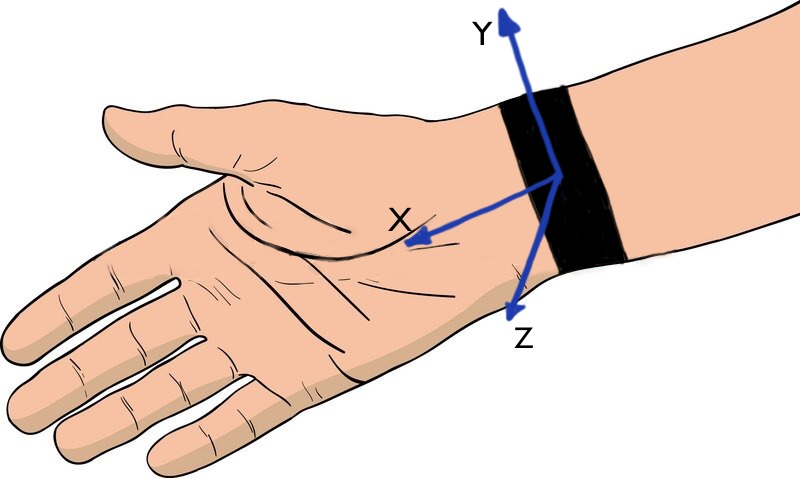

In [4]:
Image(filename='hand.jpg')

NB: The orientation of the postive axis is not known from the data file description so actual directions may be reveresed to image shown above

## Basic Feature Generation

In [14]:
# function to calculate the root mean square
def rms(x):   
    return np.sqrt(x.dot(x)/x.size) 

In [15]:
# function to create all the model features; loop through each tuple in list
def createFeatures(activityTuple):
    
    features = pd.DataFrame(index = range(0,len(activityTuple)),columns = ['x_max','y_max','z_max','tot_max', \
                                                                           'x_min','y_min','z_min','tot_min',\
                                                                           'x_mean','y_mean','z_mean','tot_mean',\
                                                                           'x_rms','y_rms','z_rms','tot_rms','totTime'\
                                                                           ,'activity'])
    for row in range(0,len(activityTuple)):
        x,y,z = activityTuple[row][1]
        activity = activityTuple[row][2]
        totAccel = (x**2 + y**2 + z**2)**0.5
        features['x_max'][row] = float(np.max(x))
        features['y_max'][row] = np.max(y)
        features['z_max'][row] = np.max(z)
        features['tot_max'][row] = np.max(totAccel)
        features['x_min'][row] = np.min(x)
        features['y_min'][row] = np.min(y)
        features['z_min'][row] = np.min(z)
        features['tot_min'][row] = np.min(totAccel)
        features['x_mean'][row] = np.mean(x)
        features['y_mean'][row] = np.mean(y)
        features['z_mean'][row] = np.mean(z)
        features['tot_mean'][row] = np.mean(totAccel)
        features['x_rms'][row] = rms(x)
        features['y_rms'][row] = rms(y)
        features['z_rms'][row] = rms(z)
        features['tot_rms'][row] = rms(totAccel)
        features['totTime'][row] = len(x)*(1/32.0)  # The activity length in seconds is no. samples * 1/sampling rate
        features['activity'][row] = str(activity)
        
    return features

In [16]:
# Generate a dataframe of features
masterFeaturesDF = createFeatures(dataList)

In [18]:
masterFeaturesDF.head()

,x_max,y_max,z_max,tot_max,x_min,y_min,z_min,tot_min,x_mean,y_mean,z_mean,tot_mean,x_rms,y_rms,z_rms,tot_rms,totTime,activity
0,0.233492,6.77126,10.0401,11.0385,-9.57316,1.63444,1.63444,8.0173,-6.84631,3.36617,4.40299,9.7627,7.52298,3.46736,5.19511,9.77788,5.25,standup_chair
1,0.700475,4.43634,12.3751,13.1483,-10.9741,-1.16746,0.233492,7.51176,-6.26761,2.45456,4.42669,9.78769,7.47104,2.5663,5.80866,9.80525,7.5625,standup_chair
2,2.10142,4.43634,10.9741,11.7838,-10.0401,-0.700475,1.63444,8.12538,-5.69456,1.5336,5.15311,9.7254,7.29368,2.19946,6.0696,9.74041,9.40625,standup_chair
3,1.63444,5.37031,10.5071,11.7467,-11.4411,-2.10143,0.233492,7.00086,-6.14467,2.42211,4.31368,9.75149,7.47437,2.67605,5.68347,9.76366,9.875,standup_chair
4,-0.233492,2.56841,10.5071,11.4839,-10.9741,-3.96936,-3.50238,6.7793,-7.25492,1.15634,3.51627,9.7052,7.92431,1.79348,5.35845,9.73264,5.25,standup_chair


In [20]:
masterFeaturesDF.dtypes

x_max       object
y_max       object
z_max       object
tot_max     object
x_min       object
y_min       object
z_min       object
tot_min     object
x_mean      object
y_mean      object
z_mean      object
tot_mean    object
x_rms       object
y_rms       object
z_rms       object
tot_rms     object
totTime     object
activity    object
dtype: object

In [21]:
# The features dataframe has been initialised as all objects whereas all columns other than activity should be float.  
# Convert to correct data type so can create plots in exploratory analysis
col_names = masterFeaturesDF.columns
col_names = col_names[0:(len(col_names)-1)]  # drop activity from col_names
masterFeaturesDF[col_names] = masterFeaturesDF[col_names].astype(float)
masterFeaturesDF.activity = masterFeaturesDF.activity.astype(str)

In [22]:
# Check that the data types for each feature has been corrected
masterFeaturesDF.dtypes

x_max       float64
y_max       float64
z_max       float64
tot_max     float64
x_min       float64
y_min       float64
z_min       float64
tot_min     float64
x_mean      float64
y_mean      float64
z_mean      float64
tot_mean    float64
x_rms       float64
y_rms       float64
z_rms       float64
tot_rms     float64
totTime     float64
activity     object
dtype: object

## Generate Plots of Features and Raw Time Series Data

#### Raw Time Series

In [23]:
# Loop through the activities and generate X,Y,Z acceleration time series plots for each activity
plt.ioff()
for activity in dataset.columns:
    dataList = []  # initialise a new empty list to fill with tuples
    dfX = pd.DataFrame()
    dfY = pd.DataFrame()
    dfZ = pd.DataFrame()
    for filename in dataset[activity].dropna():
        output = createTuple(filename)     
        dataList.append(output)
    for row in range(0,len(dataList)):
        x,y,z = dataList[row][1]
        colNameX = "X"+ str(row)
        colNameY = "Y"+ str(row)
        colNameZ = "Z"+ str(row)
        # Don't know why setting the column names in the dataframe initialisation isn't working
        # interim fix, can come back later and correct this with more time to review
        x_list = pd.DataFrame(x, dtype=float)
        x_list.columns = [colNameX]
        dfX = pd.concat([dfX,x_list],axis = 1)
        y_list = pd.DataFrame(y, dtype=float)
        y_list.columns = [colNameY]
        dfY = pd.concat([dfY,y_list],axis = 1)
        z_list = pd.DataFrame(z, dtype=float)
        z_list.columns = [colNameZ]
        dfZ = pd.concat([dfZ,z_list],axis = 1)
    
    sns.set_style("white")
    sns.set(font_scale=2)
    plt.figure(figsize=(18.5,10.5))
    plt.plot(np.arange(0,len(dfX)*(1/32.0),(1/32.0)),dfX)
    sns.axlabel('Seconds', 'Acceleration [g]')
    title = activity + " x accel"
    plt.title(title)
    plt.savefig("../Plots/Time/"+title +".png",dpi=200,facecolor='white')
    plt.close()
    plt.figure(figsize=(18.5,10.5))
    plt.plot(np.arange(0,len(dfY)*(1/32.0),(1/32.0)), dfY)
    sns.axlabel('Seconds', 'Acceleration [g]')
    title = activity + " y accel"
    plt.title(title)
    plt.savefig("../Plots/Time/"+title +".png",dpi=200)
    plt.close()
    plt.figure(figsize=(18.5,10.5))
    plt.plot(np.arange(0,len(dfZ)*(1/32.0),(1/32.0)), dfZ)
    sns.axlabel('Seconds', 'Acceleration [g]')
    title = activity + " z accel"
    plt.title(title)
    plt.savefig("../Plots/Time/"+title +".png",dpi=200)
    plt.close()

plt.ion()

Sample raw time series plot
![](brush_teeth y accel.png)

From this plot (and others) we see that the accelerations exerted on the sensor exceeded the sensor range resulting in the peaks being clipped at 1.5g

#### Feature boxplots by activity

In [27]:
# Generate Boxplots for each feature, grouped by activity and output to .png files in the Plots/Box/ folder
plt.ioff()
sns.set()
sns.set(style="whitegrid")
sns.set_context("talk")
for name in col_names:
    g = sns.boxplot(x="activity", y=name, data=masterFeaturesDF)
    plt.xticks(rotation=90) 
    g.set_title('boxplot of ' + name)
    g.set_ylabel("Acceleration [g]")
    plt.tight_layout()
    plt.savefig("../Plots/Box/"+str(name) +".png",dpi=200)
    plt.close()
plt.ion()    

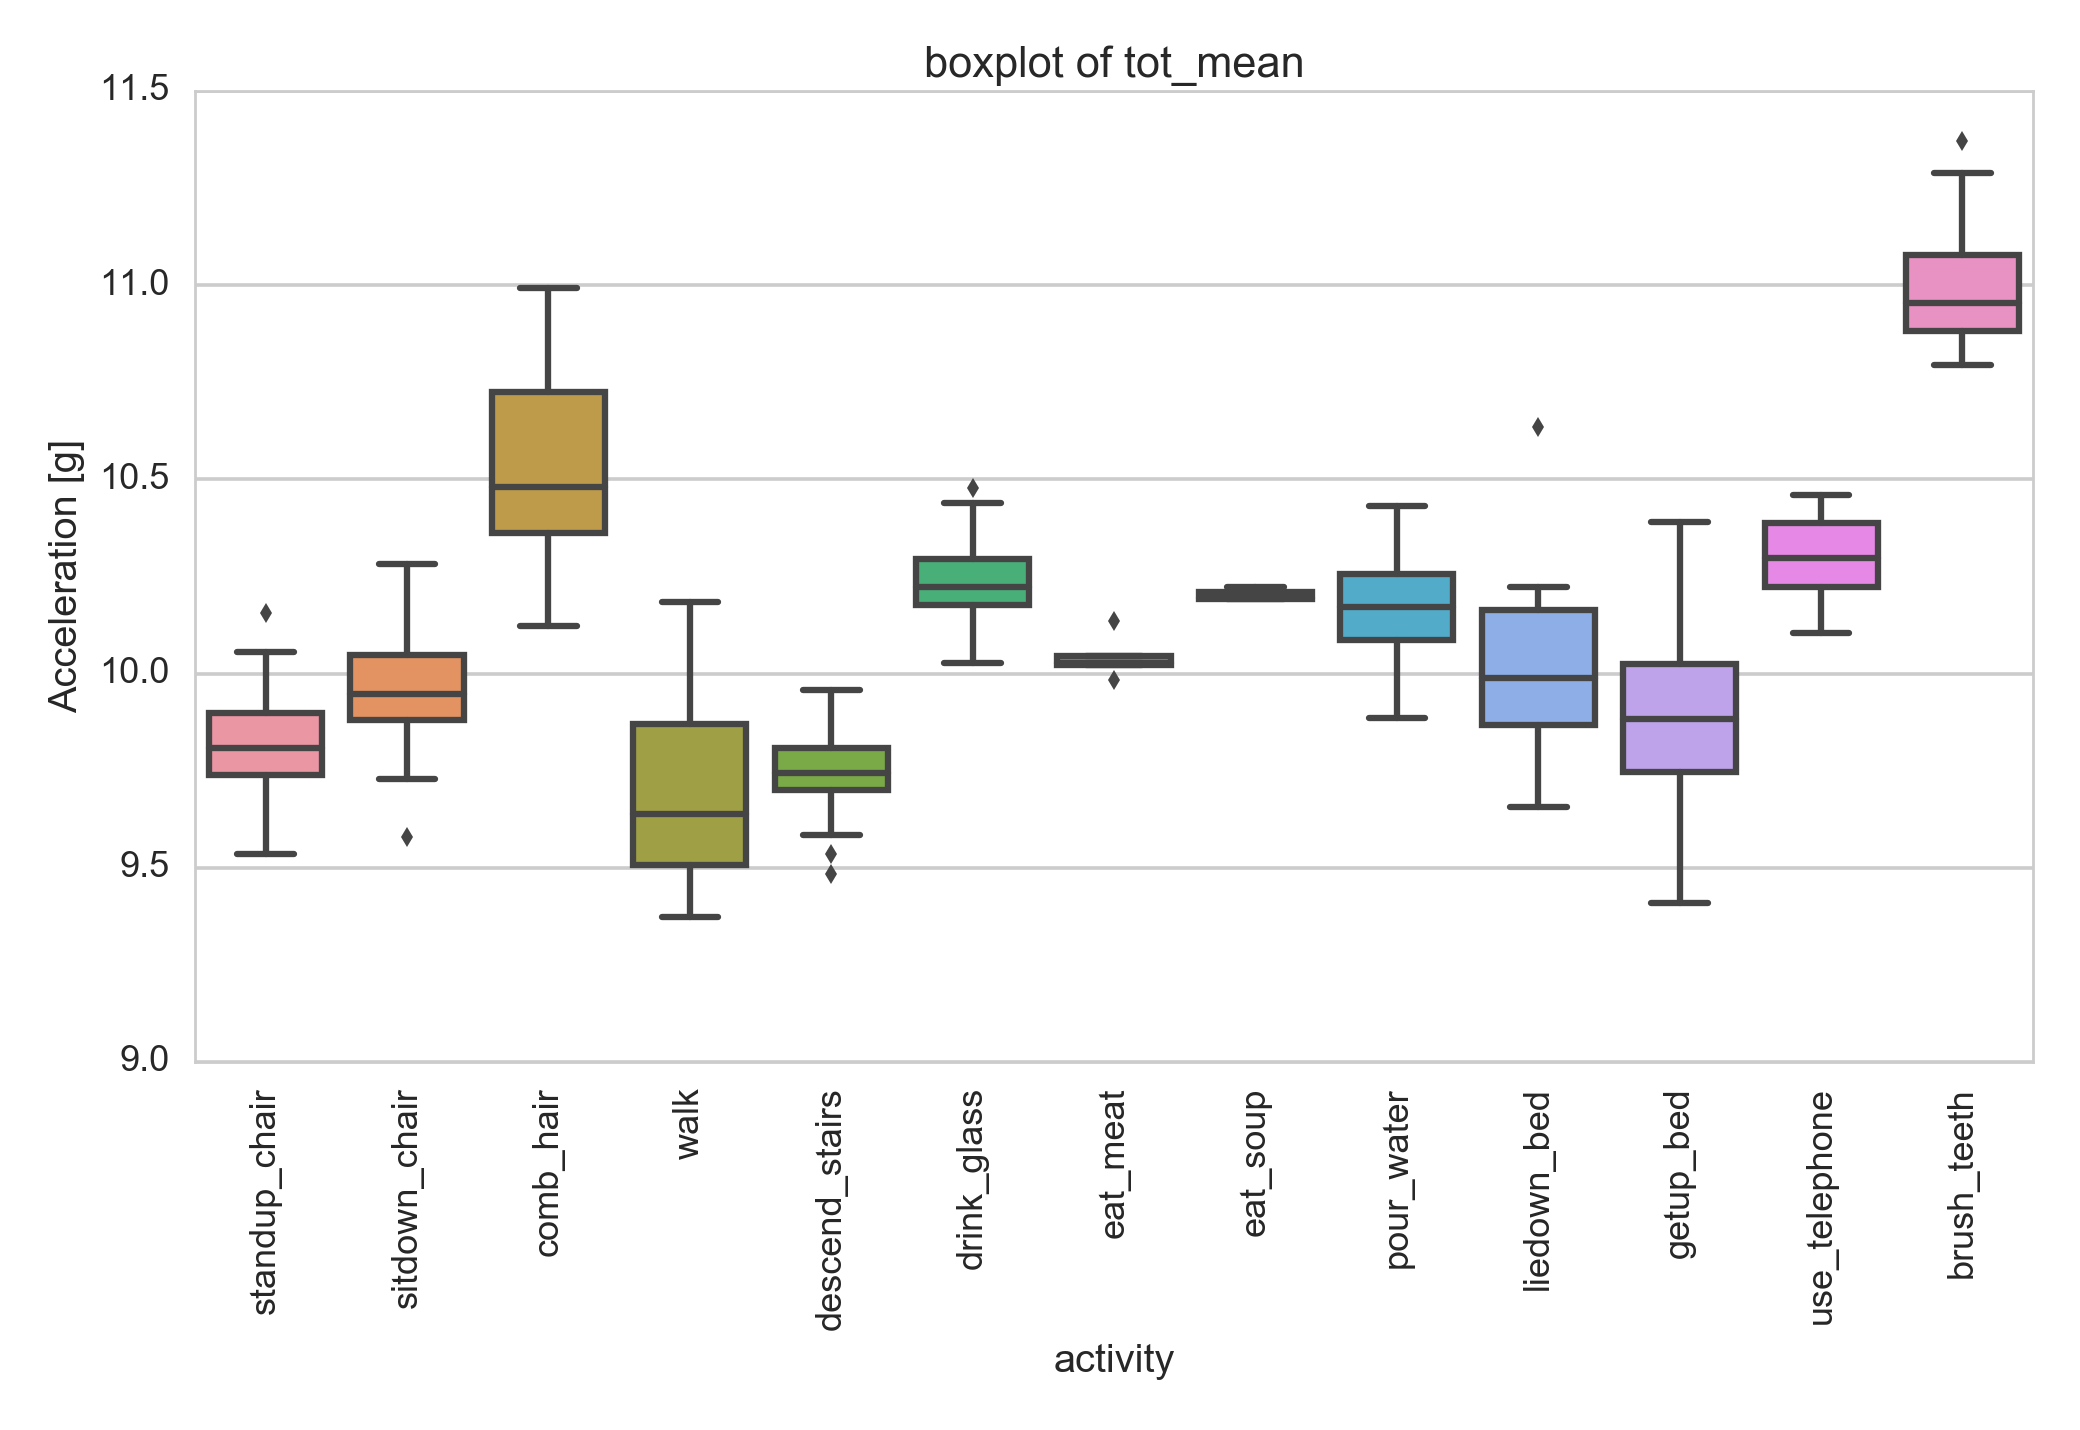

In [8]:
# Sample boxplot
Image('tot_mean.png')

#### Scatterplot

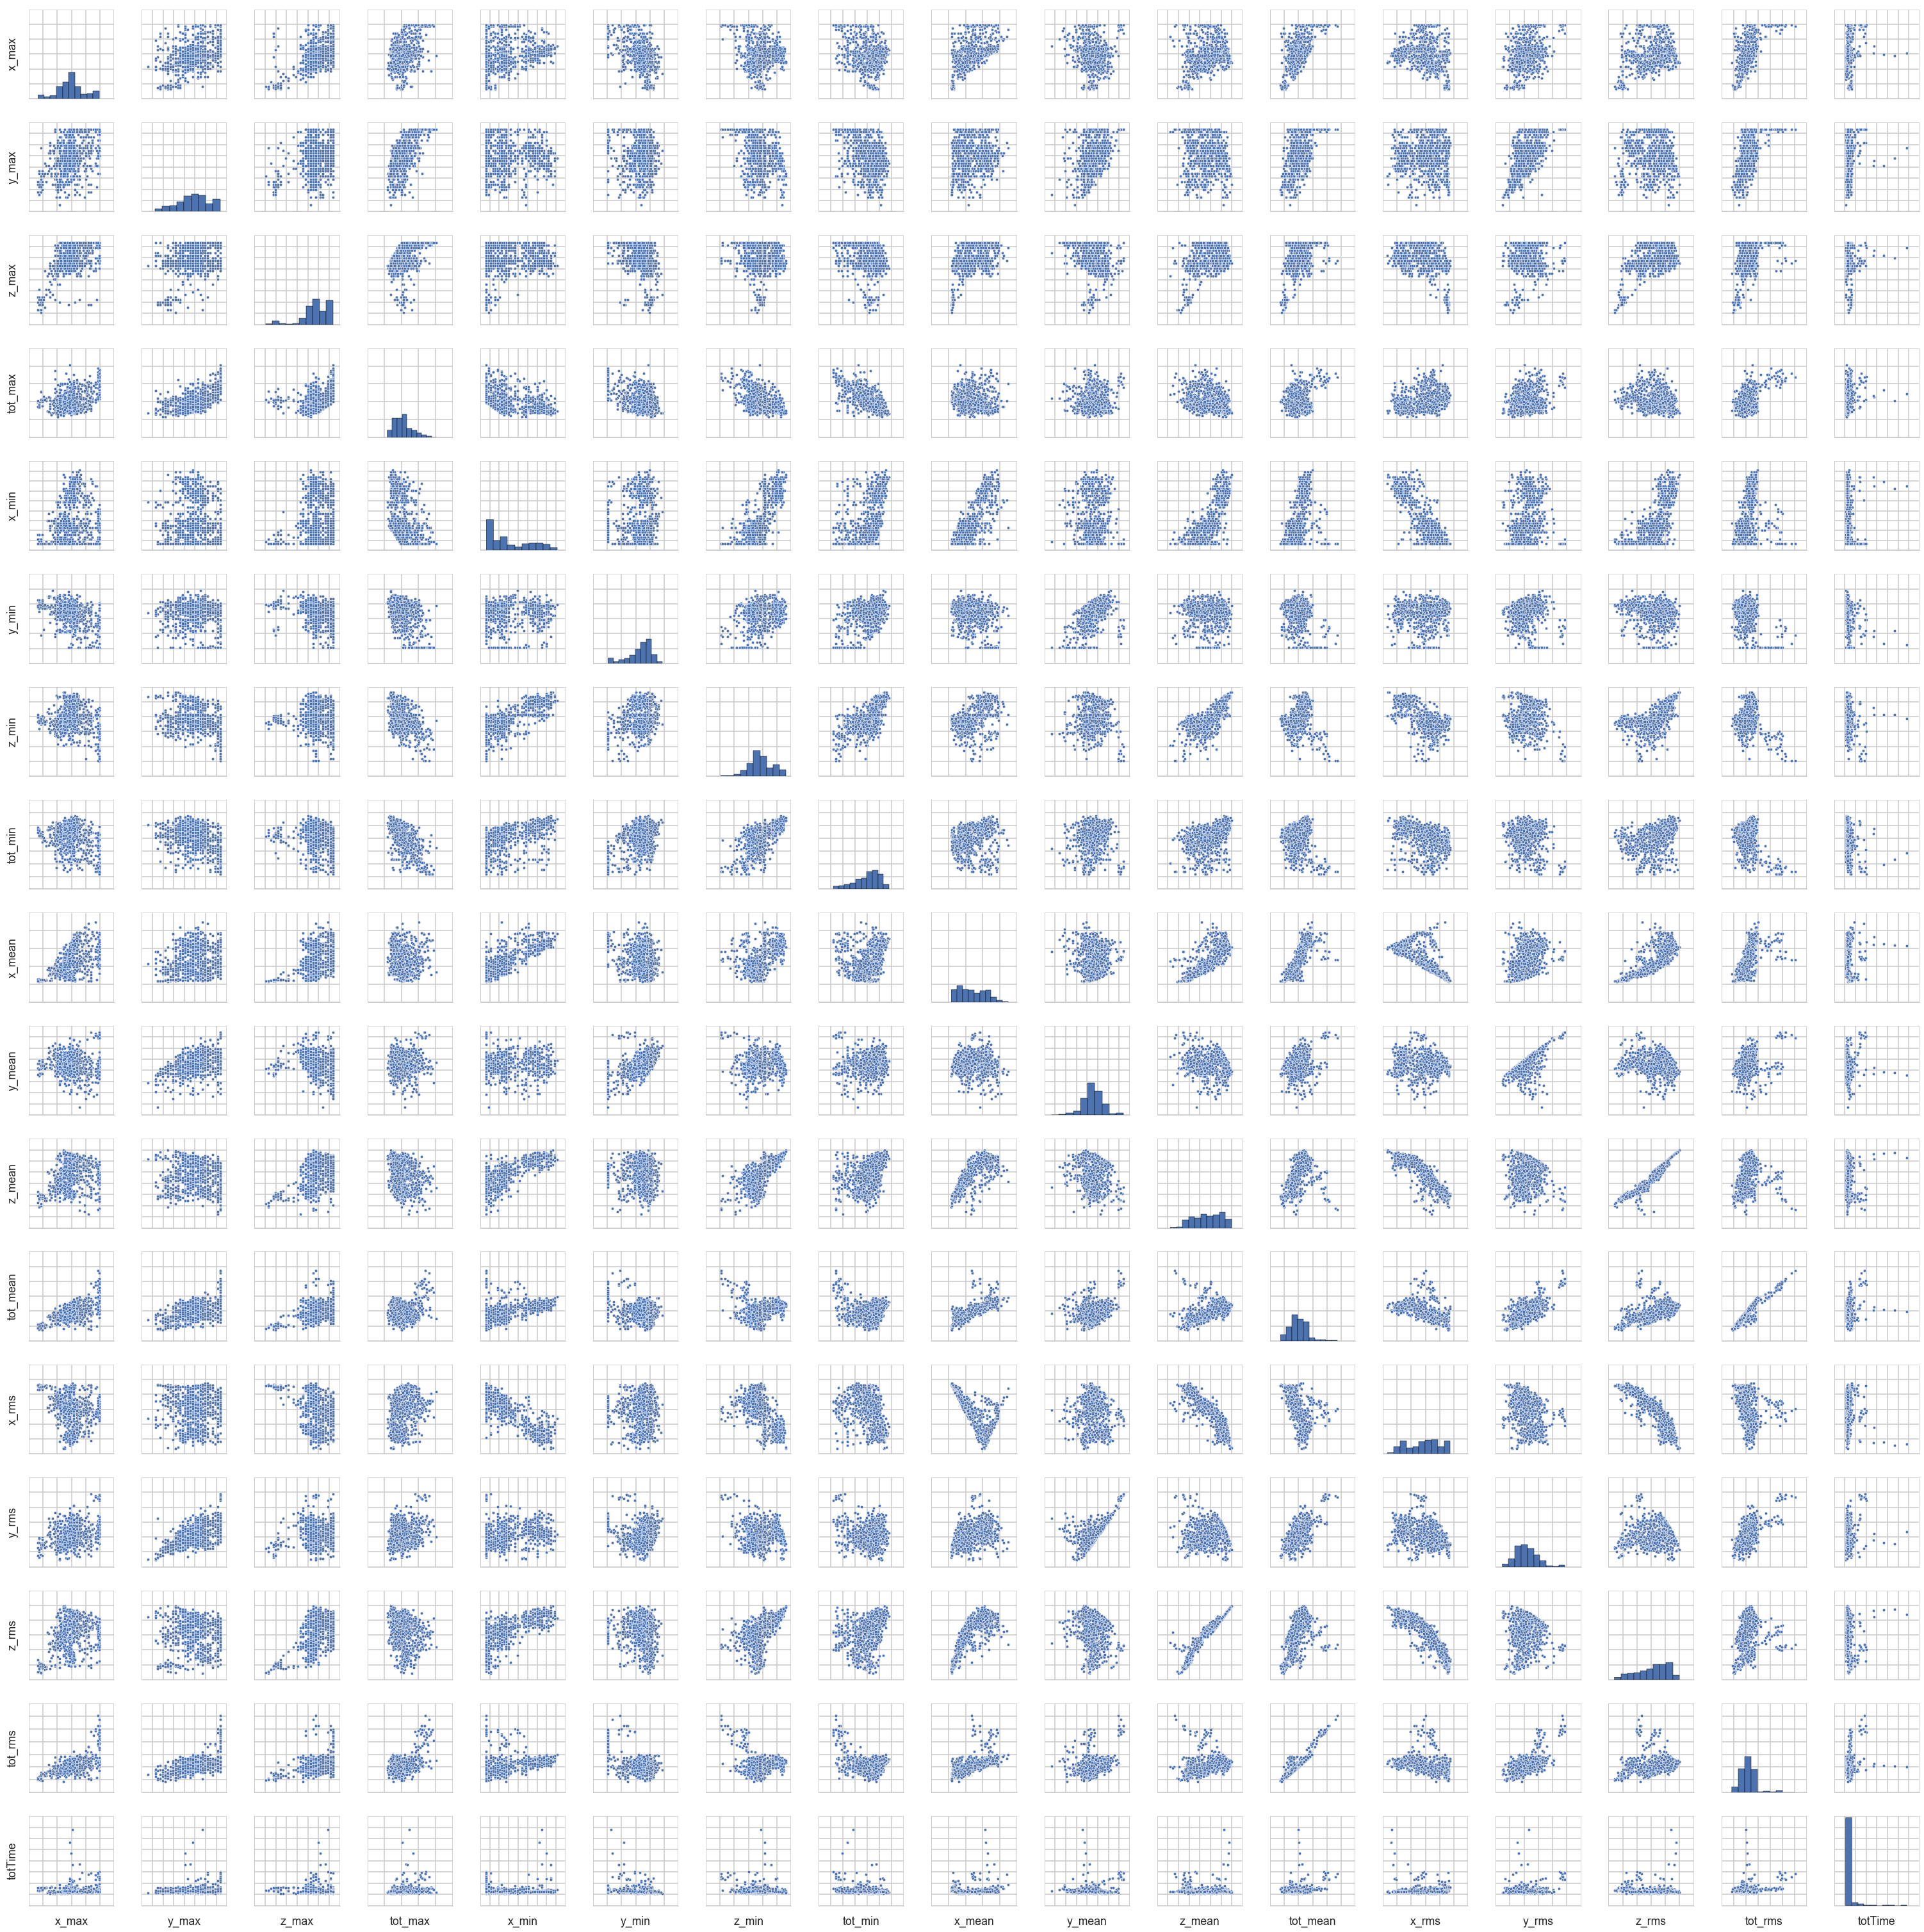

In [34]:
# Plot a seaborn pairplot for relationship between features.  Save in Plots/Pair/ folder
sns.set()
sns.set(style="whitegrid")
sns.set_context("poster")
g = sns.pairplot(masterFeaturesDF)
g.set(xticklabels=[])
g.set(yticklabels=[])
plt.savefig("../Plots/Pair/FeaturePairPlot.png",dpi=200)

#### Histograms looking at what seperation there is (per feature) in classifying each activity

In [36]:
# For each feature, print a histogram for each activity for True/False (is/is not) that activity to see how 
# much the data overlaps and whether there are any good features that show good seperation between the two sets
# save in Plots/Histo/ folder
df = masterFeaturesDF

plt.ioff()
sns.set()
sns.set(style="white")
sns.set_context("talk")
for feature in col_names:
    for activity in df['activity'].unique():
        fig,ax = plt.subplots()
        fmax = int(df[feature][df['activity']==activity].max())+1
        fmin = int(df[feature][df['activity']==activity].min())-1
        binsize = np.arange(fmin,fmax,((fmax-fmin)/50.0))
        sns.distplot(df[feature][df['activity']==activity],ax=ax,kde=False,label=('is '+ str(activity)),bins=binsize,\
                     color='b',norm_hist=True)
        sns.distplot(df[feature][df['activity']!=activity],ax=ax,kde=False,label=('is not '+ str(activity)),\
                     bins=binsize,color='r',norm_hist=True)
        plt.title("Histogram of " + str(feature))
        plt.legend(frameon=True)
        plt.savefig("../Plots/Histo/"+ str(activity)+"-"+str(feature)+".png",dpi=200)
        plt.close()        
plt.ion()

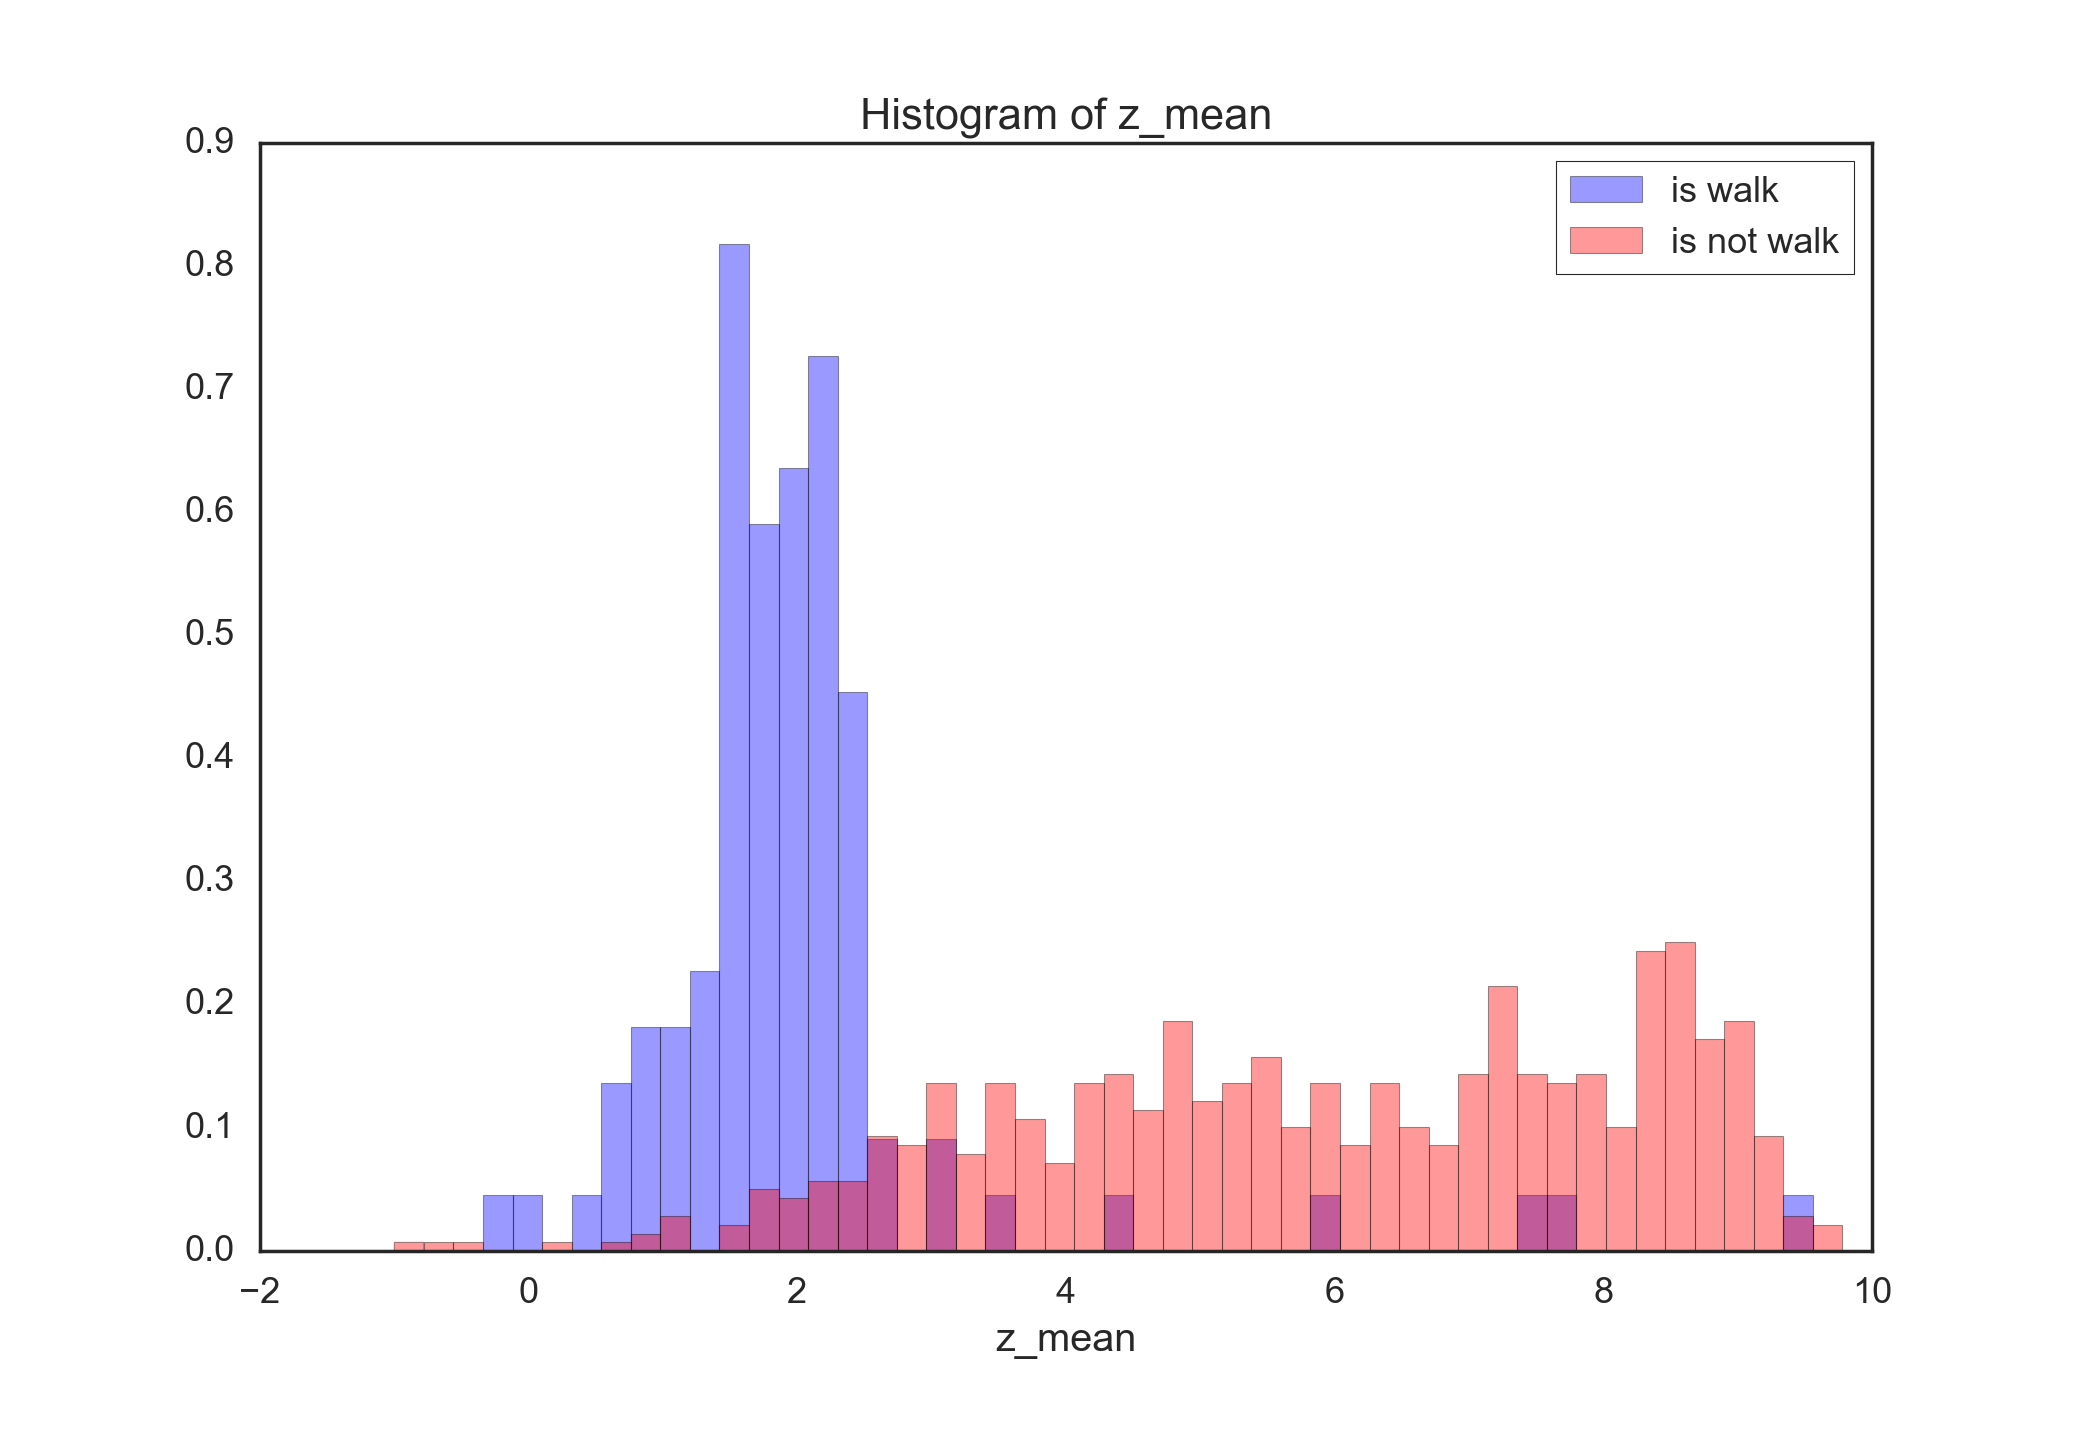

In [9]:
# Sample histogram
Image('walk-z_mean.png')

Based upon a review of the time series plots, it can be seen that the measurements need smoothing.  A median filter will be applied during the conversion process

Example of a raw and filtered activity time series

In [128]:
x,y,z = dataList[300][1]

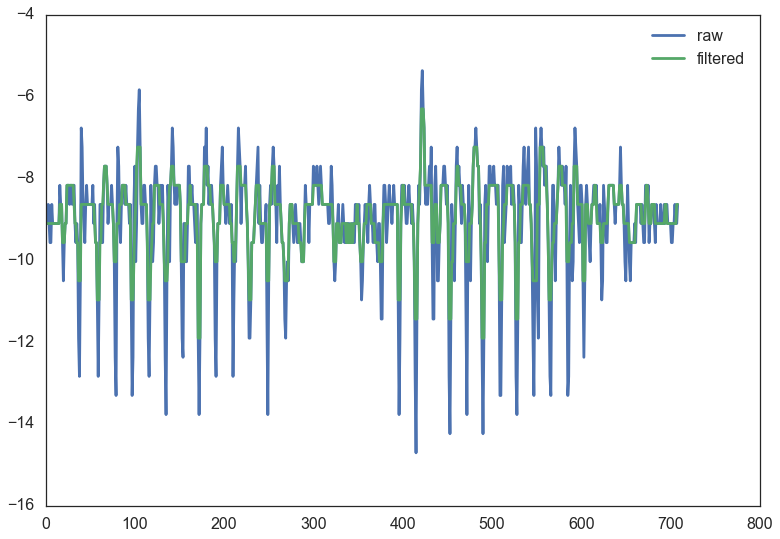

In [116]:
sns.set(style="white")
sns.set_context("poster")
x_new = sp.medfilt(x, kernel_size=5)
plt.plot(x,label = 'raw')
plt.plot(x_new,label = 'filtered')
plt.legend()
plt.savefig('filtered.png')
plt.show()

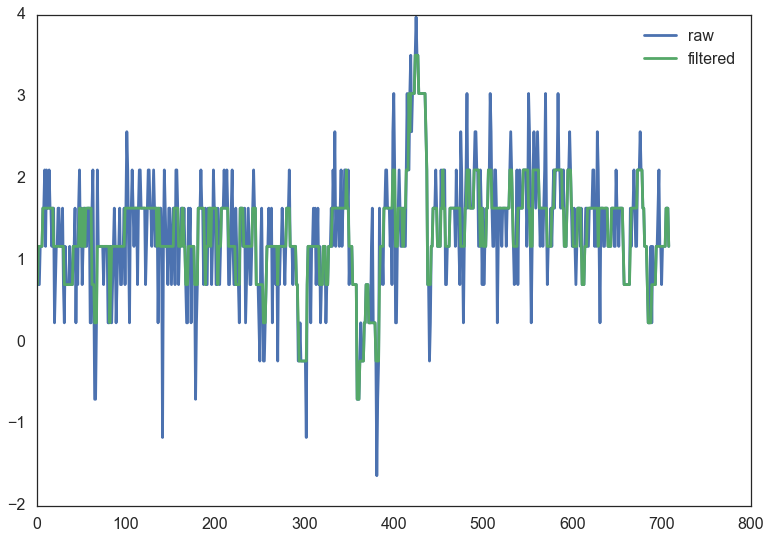

In [117]:
sns.set(style="white")
sns.set_context("poster")
y_new = sp.medfilt(y, kernel_size=5)
plt.plot(y,label = 'raw')
plt.plot(y_new, label = 'filtered')
plt.legend()
plt.show()

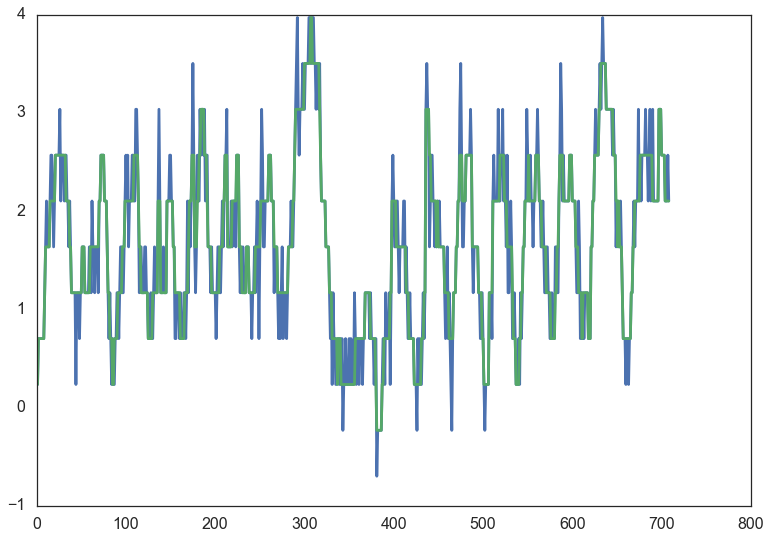

In [118]:
sns.set(style="white")
sns.set_context("poster")
z_new = sp.medfilt(z, kernel_size=5)
plt.plot(z,label = 'raw')
plt.plot(z_new, label = 'filtered')
plt.legend
plt.show()

Example output of the lowpass filter used to extract the gravity and body accelerations

In [119]:
# Apply a butterworth low pass filter
N  = 5    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = sp.butter(N, Wn, output='ba')

# Second, apply the filter
fx = sp.filtfilt(B,A, x)
fy = sp.filtfilt(B,A, y)
fz = sp.filtfilt(B,A, z)
# Extract body accelerations
bx = x - fx
by = y - fy
bz = z - fz


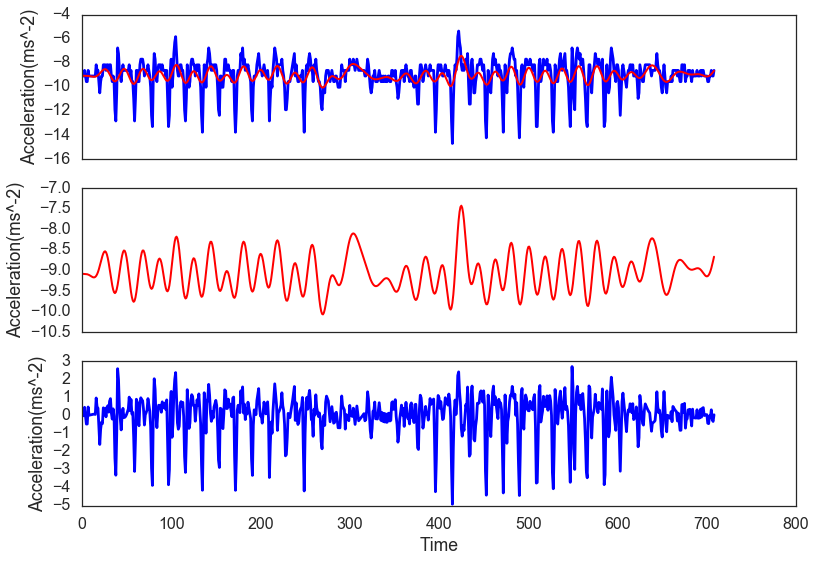

In [132]:
# Make plots
sns.set(style="white")
sns.set_context("poster")
time = range(0,len(x))
fig = plt.figure()
ax1 = fig.add_subplot(311)
plt.plot(time,x, 'b-')
plt.plot(time,fx, 'r-',linewidth=2)
plt.ylabel('Acceleration(ms^-2)')
ax1.axes.get_xaxis().set_visible(False)
ax1 = fig.add_subplot(312)
plt.plot(time,fx, 'r-',linewidth=2)
plt.ylabel('Acceleration(ms^-2)')
ax1.axes.get_xaxis().set_visible(False)
ax1 = fig.add_subplot(313)
plt.plot(time,bx, 'b-')
plt.ylabel('Acceleration(ms^-2)')
plt.xlabel('Time')

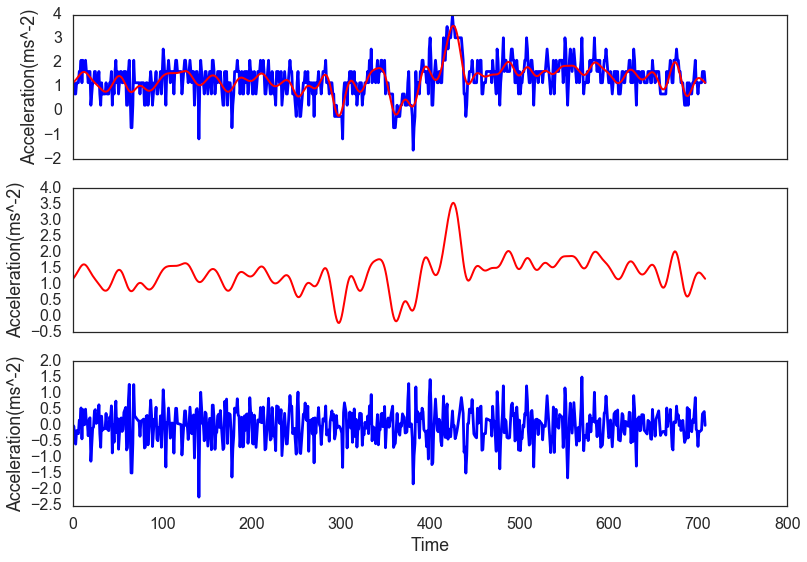

In [134]:
# Make plots
sns.set(style="white")
sns.set_context("poster")
time = range(0,len(x))
fig = plt.figure()
ax1 = fig.add_subplot(311)
plt.plot(time,y, 'b-')
plt.plot(time,fy, 'r-',linewidth=2)
plt.ylabel('Acceleration(ms^-2)')
ax1.axes.get_xaxis().set_visible(False)
ax1 = fig.add_subplot(312)
plt.plot(time,fy, 'r-',linewidth=2)
plt.ylabel('Acceleration(ms^-2)')
ax1.axes.get_xaxis().set_visible(False)
ax1 = fig.add_subplot(313)
plt.plot(time,by, 'b-')
plt.ylabel('Acceleration(ms^-2)')
plt.xlabel('Time')

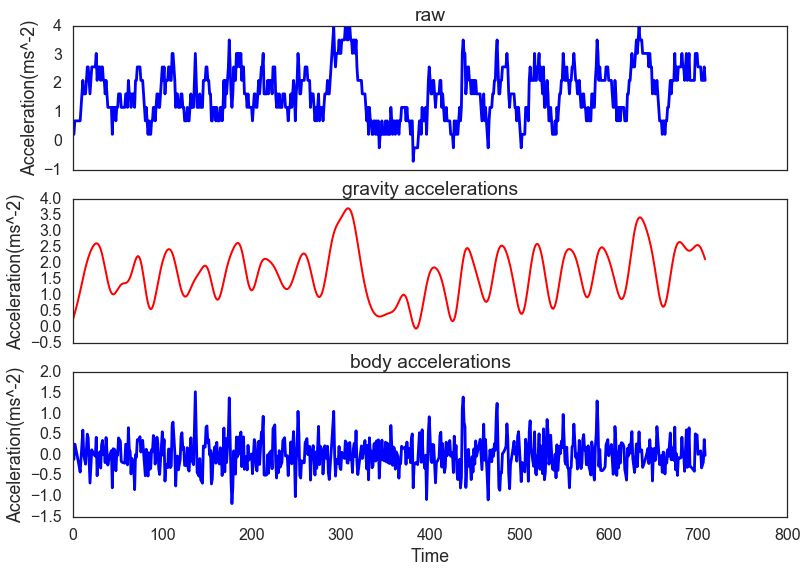

In [137]:
# Make plots
sns.set(style="white")
sns.set_context("poster")
time = range(0,len(x))
fig = plt.figure()
ax1 = fig.add_subplot(311)
plt.plot(time,z, 'b-')
plt.ylabel('Acceleration(ms^-2)')
plt.title('raw')
ax1.axes.get_xaxis().set_visible(False)
ax1 = fig.add_subplot(312)
plt.plot(time,fz, 'r-',linewidth=2)
plt.ylabel('Acceleration(ms^-2)')
plt.title('gravity accelerations')
ax1.axes.get_xaxis().set_visible(False)
ax1 = fig.add_subplot(313)
plt.plot(time,bz, 'b-')
plt.xlabel('Time')
plt.ylabel('Acceleration(ms^-2)')
plt.title('body accelerations')
plt.savefig('lowpassfilter.png')

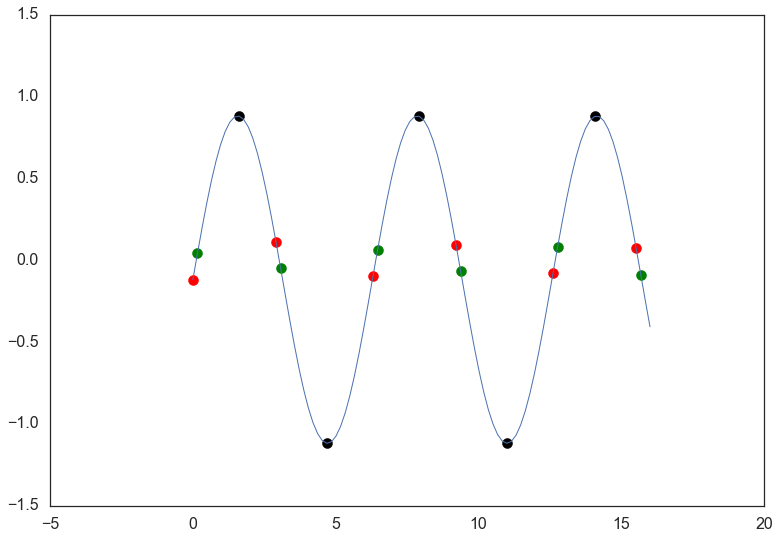

In [123]:
# Demo for finding the zero crossing point, peaks and troughs
# Test out procedure to find zero point crossings
sns.set(style="white")
sns.set_context("poster")
x = np.linspace(0,16,100)
y = np.sin(x)
y_mean = np.mean(y)
g = [a - y_mean for a in y]
r = np.where(np.diff(np.signbit(g)))[0]
s = r + 1
xp = [x[i] for i in r]
yp = [g[i] for i in r]
xr = [x[i] for i in s]
yr = [g[i] for i in s]

peakList = []
valleyList = []
for pos in range(1,len(y)-1):
    if g[pos-1] < g[pos] > g[pos+1]:
        peakList.append(pos)
    elif g[pos-1] > g[pos] < g[pos+1]:
        valleyList.append(pos)
        
xt = [x[i] for i in peakList]
yt = [g[i] for i in peakList]
xu = [x[i] for i in valleyList]
yu = [g[i] for i in valleyList]

plt.plot(x,g,linewidth=1)
plt.scatter(xp, yp, marker="o",color = 'red',s=100)
plt.scatter(xr, yr, marker="o",color = 'green',s=100)
plt.scatter(xt, yt, marker="o",color = 'black',s=100)
plt.scatter(xu, yu, marker="o",color = 'black',s=100)
plt.savefig('peaks-valleys.png')